<a href="https://colab.research.google.com/github/godud2604/AI-bootcamp/blob/main/LSTM_%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM 활용 감성 분석

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Flatten
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam
import numpy as np

# Set the parameters
max_features = 20000

# Load the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

17464789/17464789 [==============================] - 2s 0us/step
(25000,) (25000,) (25000,) (25000,)


In [3]:
print( x_train[0], len( x_train[0] ), sep='\n')

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218


In [2]:
# Get the word index
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 1s 1us/step


In [6]:
# Reverse the word index
reverse_word_index = dict([ (value, key) for key, value in word_index.items()])

In [7]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [11]:
# Decode the first review in x_train
stmt = x_train[0]
decoded_review = ' '.join([ reverse_word_index.get(i-3, '*') for i in stmt])
print( decoded_review)
print( stmt, '\n', len(stmt))

* this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert * is an amazing actor and now the same being director * father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the * of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what th

In [12]:
type(y_train[0])

numpy.int64

In [14]:
# Count the number of occurrences of each label in y_train
unique, counts = np.unique (y_train, return_counts= True )
print( unique ) # 0과 1 존재
print( counts ) # 0은 12500개, 1은 12500개 => 긍정문 절반, 부정문 절반

[0 1]
[12500 12500]


In [15]:
# 단어가 긴 문장을 학습시킬때는 simpleRNN 보다는 LSTM이 더 적합하다
sent_len = np.array([ len(sent)  for sent in x_train])
print( np.max(sent_len)) # 단어가 2492개
print( np.mean(sent_len) ) # 평균은 238

2494
238.71364


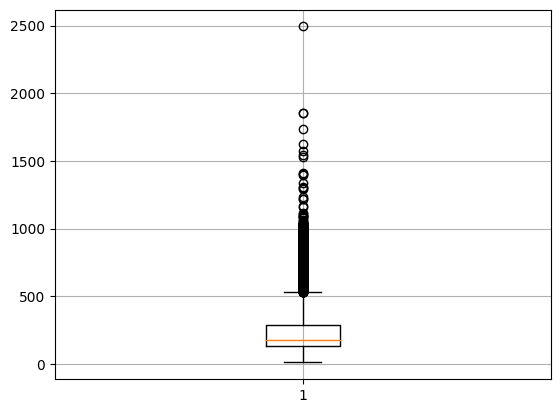

In [16]:
import matplotlib.pyplot as plt
plt.boxplot( sent_len )
plt.grid( True )
plt.show()

# padding을 할 때 기준점 고민 (2500 or 600 or 500)

In [17]:
# Pad the sequences
max_len = 600
x_train = sequence.pad_sequences(x_train, maxlen=max_len) # maxlen을 어떻게 정하냐.
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

print(x_train.shape, x_test.shape)

(25000, 600) (25000, 600)


In [22]:
# Read 5 samples
import random
sample_idx = random.sample(range(25000), 5)
print( type(x_train[0]), len(x_train[0]), sep='\n' )
print(x_train[sample_idx])

<class 'numpy.ndarray'>
600
[[   0    0    0 ...   18    4  288]
 [   0    0    0 ...  119 7935  455]
 [   0    0    0 ...  528   30  685]
 [   0    0    0 ...  886    4  274]
 [   0    0    0 ...  368    7 6003]]


- https://keras.io/api/layers/core_layers/embedding/

In [23]:
embedding_dim = 256

# Define the model
model = Sequential()
model.add(  Embedding( max_features, embedding_dim )  )
model.add(  LSTM( 512 )  )
model.add(  Dense( 1, activation='sigmoid' )  )
print(model.summary())

# Compile the model
model.compile( optimizer= Adam( learning_rate = 1E-4),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

# Train the model
fit_history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                        epochs=5, batch_size=250)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, batch_size=250)
print(f'Test loss: {loss:.4f} - accuracy: {accuracy:.4f}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         5120000   
                                                                 
 lstm (LSTM)                 (None, 512)               1574912   
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 6695425 (25.54 MB)
Trainable params: 6695425 (25.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
100/100 [==============================] - 75s 681ms/step - loss: 0.6566 - accuracy: 0.6410 - val_loss: 0.6435 - val_accuracy: 0.6943
Epoch 2/5
100/100 [==============================] - 75s 749ms/step - loss: 0.5151 - accuracy: 0.7724 - val_loss: 0.3721 - val_accu

In [24]:
def plot_training_history(fit_history):
    # 학습이력 그래프로 확인하기
    vloss = fit_history.history.get('val_loss') # 검증셋 loss
    loss = fit_history.history.get('loss') # 학습셋

    plt.figure(figsize=(8,4))
    epoch = np.arange(len(loss))
    plt.subplot(211)
    if vloss != None:
        plt.plot(epoch, vloss, 'r',  marker='.',label='validation_loss')
    plt.plot(epoch, loss, 'b',  marker='.', label='loss')
    plt.legend(loc='best')


    vacc = fit_history.history.get('val_accuracy') # 검증셋 정확도
    acc = fit_history.history.get('accuracy') # 학습셋
    if acc != None:
        plt.subplot(212)
        if vacc != None:
            plt.plot(epoch, vacc, 'r', marker='.',label='validation_acc')
        plt.plot(epoch, acc, 'b', marker='.', label='accuracy')
        plt.legend(loc='best')
    plt.show()

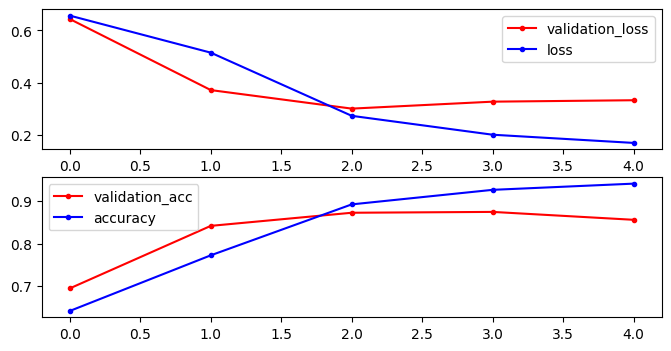

In [25]:
plot_training_history(fit_history)

In [27]:
from sklearn.metrics import confusion_matrix

# 테스트 데이터에 대한 예측값 계산
y_pred = model.predict(x_test)

y_pred = ( y_pred >= 0.5 ).astype(int).flatten()

# confusion matrix 생성
cm = confusion_matrix(y_test, y_pred)
print(cm)


782/782 [==============================] - 29s 36ms/step
[[11562   938]
 [ 2656  9844]]
